In [241]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
import sys 

project_root = Path().cwd()
scripts_dir = project_root / "src" / "scripts"
sys.path.insert(0, str(scripts_dir))

import numpy as np 
import scipy.stats as stats
import scipy.io as sio
import os 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import process_2p as p2p
import trackcells as t2p
import lick_behav_analysis as behav
from scalebars import add_scalebar
from matplotlib.lines import Line2D
import classify_2p as c2p
from cmap import Colormap


#Recording parameters
fps = 15
framespertrial = 375 
ms_per_frame = int(1000//fps)
reward_frame = 150
cue_frame = 105
trials = 30
from matplotlib.colors import LinearSegmentedColormap
colors = ['#020202', '#ffffff', "#316dc1" ]
custom_cmap = LinearSegmentedColormap.from_list("custom_bwblue", colors, N=256)

In [14]:
x = np.zeros((10, 10, 10))
row, col, depth = x.shape
row

10

In [71]:
path = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fed 30 sucrose/glp6_fedNoCues_L180P815_600um-03062024-1321-073/suite2p/plane0'

In [72]:
fed_folder = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fed 30 sucrose'
fasted_folder = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted 30 sucrose'
roi_folder = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/roi files'

In [242]:
all_avg_f, all_baseline_data, all_aligned_f, all_successful_f = t2p.process_2p_folder_tracked(fasted_folder, roi_folder, roi_name = 'fasted')
all_avg_fed, all_baseline_data_fed, all_aligned_fed, all_successful_fed = t2p.process_2p_folder_tracked(fed_folder, roi_folder, roi_name = 'fed')

glp10_fasted_30suc_L170P800_560um_040724-005
[3, 30, 21, 4, 7, 8, 12, 13, 14, 16, 20, 18, 19, 23, 24, 29, 28, 33, 0, 35, 37, 40, 42, 51, 55]
glp17_fasted30suc_L150P800_565um-032
[7, 6, 10, 12, 14, 13, 16, 15, 17, 21, 22, 18, 25, 23, 26, 8, 30, 29, 1, 35, 36, 37]
glp23_fasted_30suc_L155P800_575um-20250205-113-selected
[4, 5, 9, 12, 13, 14, 15, 17, 19, 20, 23, 25, 26]
glp4_fasted_nocues_L180_p815_650um031124-003
[2, 4, 3, 10, 11, 8, 13, 6, 16]
glp6_fastedNoCues_L180_P815_600um-_-03092024-1421-084
[30, 28, 0, 31, 6, 8, 10, 11, 14, 12, 18, 20, 19, 1, 23, 24, 25, 27, 26, 29, 33, 34, 36, 38, 40, 41, 42, 44, 43, 49, 51]
glp10_fed_30suc_L170P800_560um_040924-025
[0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 16, 19, 21, 22, 23, 24, 25, 27, 29, 31, 36, 38]
glp17_fed30suc_L150P800_565um_0613-020
[0, 1, 2, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 20, 21, 22, 23, 25, 26, 27, 28, 29]
glp23_fed_30suc_L155P800_575um-20250203-112
[5, 6, 8, 9, 10, 11, 14, 15, 16, 20, 25, 26, 29]
glp4_fedNoCues_L180_P815_650u

(25, 13, 225) (25, 28, 225)
(22, 11, 225) (22, 15, 225)
(13, 21, 225) (13, 20, 225)
(9, 11, 225) (9, 22, 225)
(31, 19, 225) (31, 26, 225)


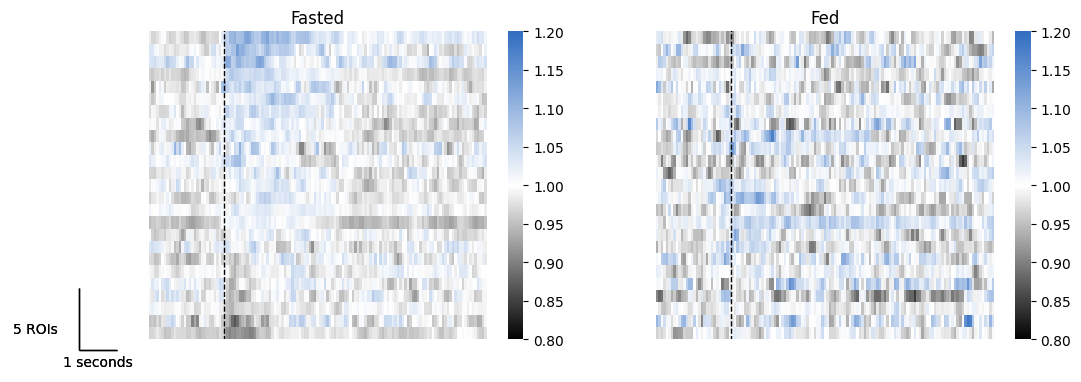

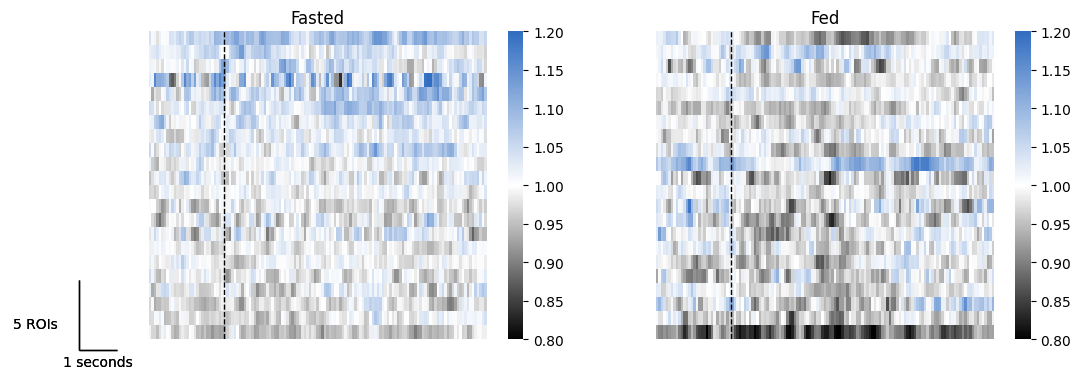

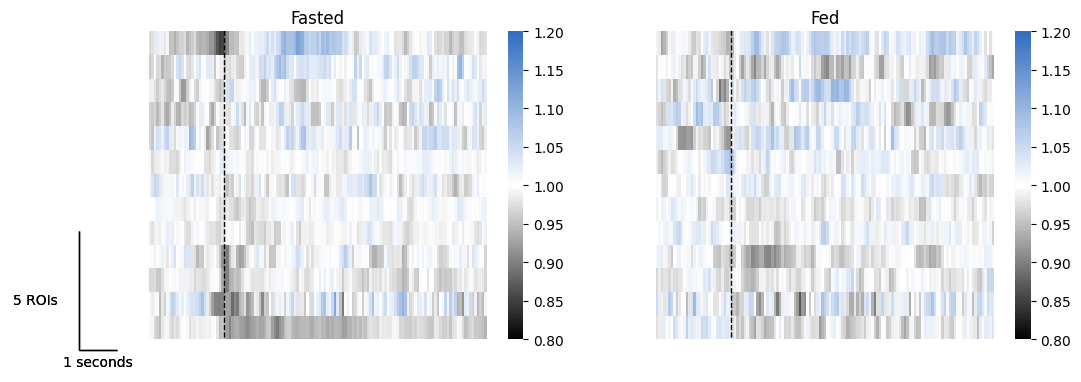

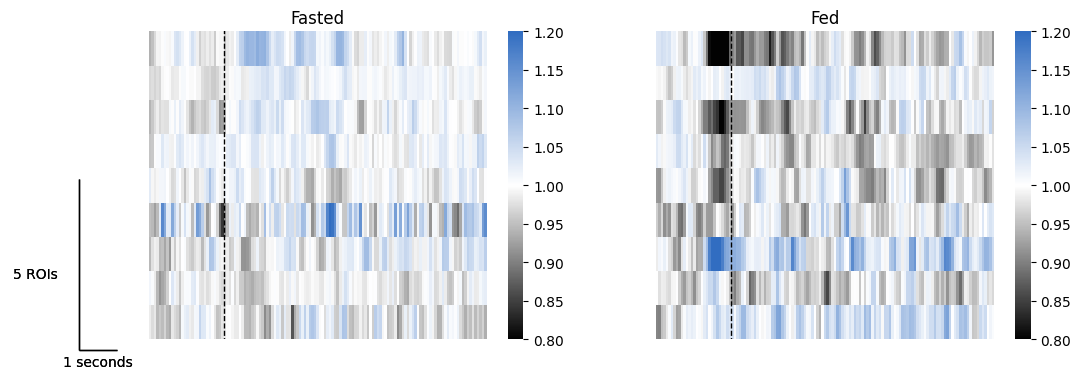

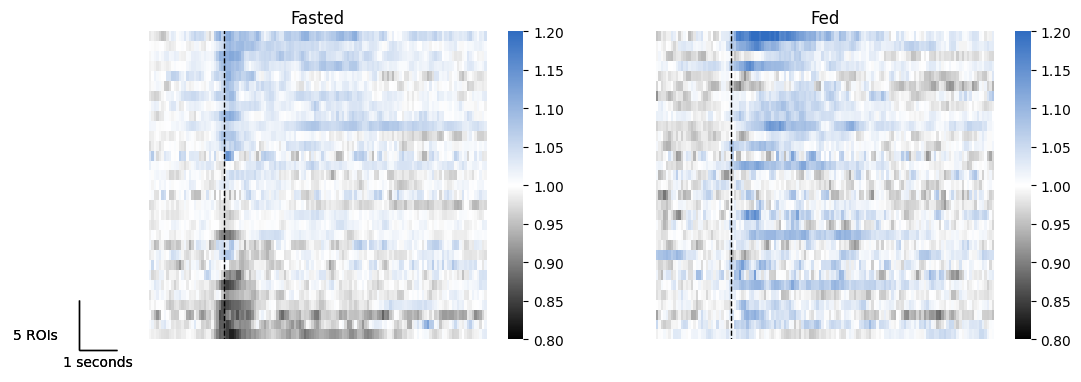

In [91]:
for i in range(len(all_aligned_fed)):
    fed_data = all_aligned_fed[i]
    f_data = all_aligned_f[i]
    print(fed_data.shape, f_data.shape)

    avg_fed = p2p.average_trials(fed_data)
    avg_f = p2p.average_trials(f_data)

    ascending_order = np.argsort(np.nanmean(avg_f[:, 75:105], axis=1))[::-1]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
    sorted_avg_mean = avg_f[ascending_order, :]

    for cell in range(sorted_avg_mean.shape[0]):
        sorted_avg_mean[cell, :] = p2p.moving_average(sorted_avg_mean[cell, :], 3)
    sns.heatmap(sorted_avg_mean, ax = ax1, vmin=0.8, vmax=1.2, cmap=custom_cmap)
    ax1.vlines(x = 75, ymin = -1, ymax = avg_f.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
    ax1.set_xticks(np.arange(15, 255, 15)[::2])
    ax1.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
    ax1.set_ylabel("ROI (Trial-Averaged)")
    ax1.set_xlim(left = 45, right = 180)
    ax1.set_xlabel("Time from First Lick")
    ax1.set_title("Fasted")
    sb = add_scalebar(ax1, matchx=False, sizex=1*15, labelx='1 seconds', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(10, 10, 0.1, 0.4))


    # fig, ax = plt.subplots(1, figsize=(8, 5))
    # ascending_order = np.argsort(np.nanmean(all_avg_f[:, 75:105], axis=1))[::-1]
    sorted_avg_mean = avg_fed[ascending_order, :]
    for cell in range(sorted_avg_mean.shape[0]):
        sorted_avg_mean[cell, :] = p2p.moving_average(sorted_avg_mean[cell, :], 3)
    sns.heatmap(sorted_avg_mean, ax = ax2, vmin=0.8, vmax=1.2, cmap=custom_cmap)
    ax2.vlines(x = 75, ymin = -1, ymax = avg_fed.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
    ax2.set_xticks(np.arange(15, 255, 15)[::2])
    ax2.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
    ax2.set_ylabel("ROI (Trial-Averaged)")
    ax2.set_xlabel("Time from First Lick")
    ax2.set_xlim(left = 45, right = 180)
    sb = add_scalebar(ax2, matchx=False, sizex=1*15, labelx='1 seconds', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(10, 10, 0.1, 0.4))
    ax2.set_title("Fed")
    # plt.savefig('tracked_fasted_heatmap_sortedbyfasted.pdf', bbox_inches='tight')


In [ ]:
mean_delta_auc_f = []
mean_delta_auc_fed = []
for i in range(len(all_aligned_fed)):
    fed_data = all_aligned_fed[i]
    fed_baseline_data = all_baseline_data_fed[i]
    f_data = all_aligned_f[i]
    f_data_baseline = all_baseline_data[i]

    avg_fed = p2p.average_trials(fed_data)
    avg_f = p2p.average_trials(f_data)
    avg_fed_baseline = p2p.average_trials(fed_baseline_data)
    avg_f_baseline = p2p.average_trials(f_data_baseline)

    print(avg_fed.shape, avg_f.shape)

    fed_baseline_auc = p2p.get_auc(avg_fed_baseline, start_frame = 45, end_frame= 75, normalize = 2000)
    fed_auc = p2p.get_auc(avg_fed, start_frame = 75, end_frame= 105, normalize = 2000)
    f_baseline_auc = p2p.get_auc(avg_f_baseline, start_frame = 45, end_frame= 75, normalize = 2000)
    f_auc = p2p.get_auc(avg_f, start_frame = 75, end_frame= 105, normalize = 2000)

    delta_fed_auc = np.abs(fed_auc - fed_baseline_auc)
    delta_f_auc = np.abs(f_auc - f_baseline_auc)


    mean_delta_auc_fed.append(np.mean(delta_fed_auc))
    mean_delta_auc_f.append(np.mean(delta_f_auc))

    # statistics 
    t_stat, p_val = stats.ttest_rel(delta_fed_auc, delta_f_auc)
    print(f"Fed vs Fasted AUC: t-statistic = {t_stat}, p-value = {p_val}")

# Statistical test for fed vs fasted
t_stat, p_val = stats.ttest_rel(mean_delta_auc_fed, mean_delta_auc_f)
print(f"Fed vs Fasted Mean Delta AUC: t-statistic = {t_stat}, p-value = {p_val}")


(25, 225) (25, 225)
Fed vs Fasted AUC: t-statistic = 0.22230488284859412, p-value = 0.8259574783294558
(22, 225) (22, 225)
Fed vs Fasted AUC: t-statistic = 1.1917300141604392, p-value = 0.2466616185583041
(13, 225) (13, 225)
Fed vs Fasted AUC: t-statistic = 0.11299700946643206, p-value = 0.9119012759371137
(9, 225) (9, 225)
Fed vs Fasted AUC: t-statistic = 1.5750292700356416, p-value = 0.1538978953447794
(31, 225) (31, 225)
Fed vs Fasted AUC: t-statistic = 1.081686405983223, p-value = 0.28801051447243664
Fed vs Fasted Mean Delta AUC: t-statistic = 2.344333148521091, p-value = 0.07900309353398098


In [232]:

tracked = []
sorted_ = []
for i in range(len(all_aligned_fed)):
    fed_data = all_aligned_fed[i]
    f_data = all_aligned_f[i]

    avg_fed = p2p.average_trials(fed_data)
    avg_f = p2p.average_trials(f_data)

    fed_auc = p2p.get_auc(avg_fed, start_frame=75, end_frame=105, normalize=2000)
    f_auc = p2p.get_auc(avg_f, start_frame=75, end_frame=105, normalize=2000)

    ascending_order1 = np.argsort(np.nanmean(avg_f[:, 75:105], axis=1))[::-1]
    f_auc_sorted = f_auc[ascending_order1]
    ascending_order2 = np.argsort(np.nanmean(avg_fed[:, 75:105], axis=1))[::-1]
    fed_auc_sorted = fed_auc[ascending_order2]


    tracked_mean_diff = np.mean(np.abs(fed_auc - f_auc))
    sorted_mean_diff = np.mean(np.abs(fed_auc_sorted - f_auc_sorted))

    print(f"Tracked Mean Diff: {tracked_mean_diff * 100}, Sorted Mean Diff: {sorted_mean_diff * 100}")

    tracked.append(tracked_mean_diff * 100)
    sorted_.append(sorted_mean_diff * 100)



Tracked Mean Diff: 3.2996873904845727, Sorted Mean Diff: 1.221798501339093
Tracked Mean Diff: 3.681023401375294, Sorted Mean Diff: 3.2484835375901895
Tracked Mean Diff: 1.6822247141087914, Sorted Mean Diff: 0.8983886591343705
Tracked Mean Diff: 5.12016952206484, Sorted Mean Diff: 2.7059659017767324
Tracked Mean Diff: 4.665124571321747, Sorted Mean Diff: 3.375456456067446


In [238]:
for x in sorted_:
    print(x)

1.221798501339093
3.2484835375901895
0.8983886591343705
2.7059659017767324
3.375456456067446


Text(0.5, 1.0, 'Fasted')

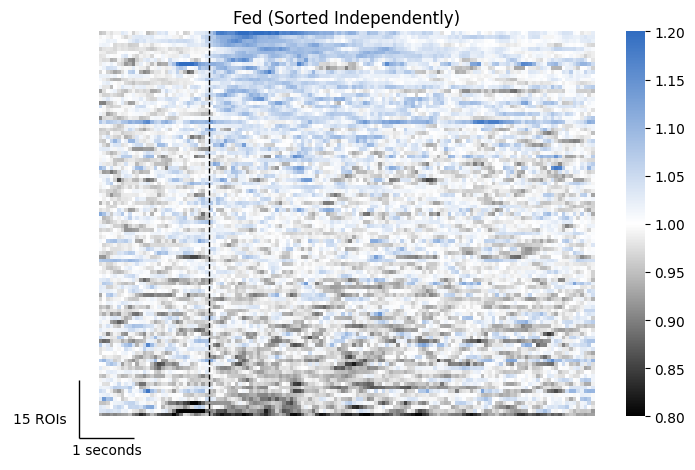

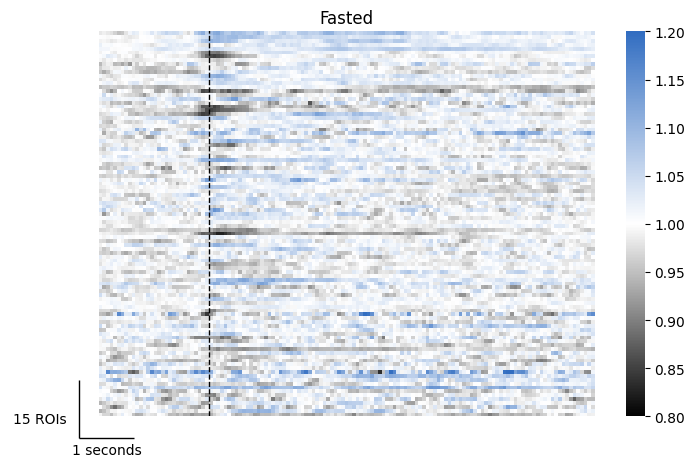

In [92]:

fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(all_avg_fed[:, 75:105], axis=1))[::-1]
sorted_avg_mean = all_avg_fed[ascending_order, :]
for cell in range(sorted_avg_mean.shape[0]):
    sorted_avg_mean[cell, :] = p2p.moving_average(sorted_avg_mean[cell, :], 3)
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap=custom_cmap)
ax.vlines(x = 75, ymin = -1, ymax = all_avg_fed.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlim(left = 45, right = 180)
ax.set_xlabel("Time from First Lick")
ax.set_title("Fed (Sorted Independently)")
sb = add_scalebar(ax, matchx=False, sizex=1*15, labelx='1 seconds', matchy=False, sep=4, sizey=-15, labely='15 ROIs',loc='lower left', bbox_to_anchor=(10, 10, 0.1, 0.4))
# plt.savefig('tracked_fed_heatmap_sortedbyfasted.pdf', bbox_inches='tight')


fig, ax = plt.subplots(1, figsize=(8, 5))
# ascending_order = np.argsort(np.nanmean(all_avg_f[:, 75:105], axis=1))[::-1]
sorted_avg_mean = all_avg_f[ascending_order, :]
for cell in range(sorted_avg_mean.shape[0]):
    sorted_avg_mean[cell, :] = p2p.moving_average(sorted_avg_mean[cell, :], 3)
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap=custom_cmap)
ax.vlines(x = 75, ymin = -1, ymax = all_avg_f.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_xlim(left = 45, right = 180)
sb = add_scalebar(ax, matchx=False, sizex=1*15, labelx='1 seconds', matchy=False, sep=4, sizey=-15, labely='15 ROIs',loc='lower left', bbox_to_anchor=(10, 10, 0.1, 0.4))
ax.set_title("Fasted")
# plt.savefig('tracked_fasted_heatmap_sortedbyfasted.pdf', bbox_inches='tight')


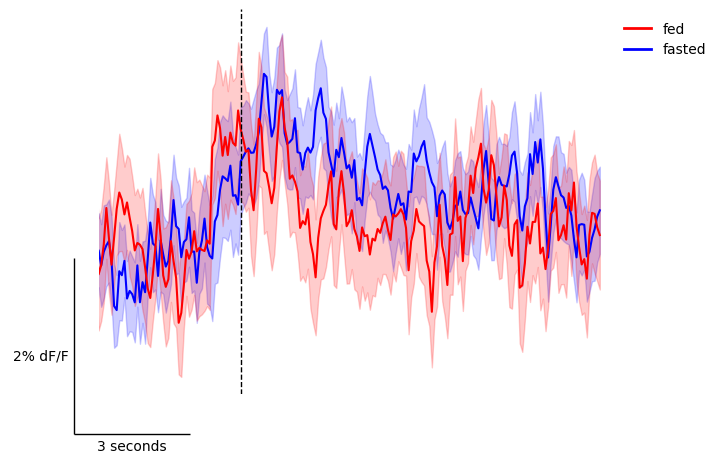

In [21]:
fig, ax = plt.subplots(1, figsize=(8, 5))
avg_fasted = np.nanmean(all_avg_f, axis=0)
avg_fed = np.nanmean(all_avg_fed, axis=0)
avg_fasted = p2p.moving_average(avg_fasted, window_size = 3) #- np.nanmean(avg_fasted[30:45]) + 1
avg_fed = p2p.moving_average(avg_fed, window_size = 3) #- np.nanmean(avg_fed[30:45]) + 1
ax.plot(np.arange(0, 225), avg_fasted, color = 'blue', label = 'Activated')
ax.plot(np.arange(0, 225), avg_fed, color = 'red', label = 'Inhibited')
ax.fill_between(np.arange(0, 225), avg_fasted - stats.sem(all_avg_f, axis=0), avg_fasted + stats.sem(all_avg_f, axis=0), color = 'blue', alpha = 0.2)
ax.fill_between(np.arange(0, 225), avg_fed - stats.sem(all_avg_fed, axis=0), avg_fed + stats.sem(all_avg_fed, axis=0), color = 'red', alpha = 0.2)
ax.axvline(x = 85, color = 'black', linestyle = '--', lw = 1)
# ax.axhline(y= 1, color = 'black', linestyle = '--', lw = 1)
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(left = 30, right = 270)
sb = add_scalebar(ax, matchx=False, sizex=3*15, labelx='3 seconds', matchy=False, sep=4, sizey=0.02, labely='2% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
custom_handles = [
    Line2D([0], [0], color='r', lw=2),
    Line2D([0], [0], color='b', lw=2)
]
custom_labels = ['fed', 'fasted']

plt.legend(custom_handles, custom_labels, loc='best', frameon = False)



In [12]:
os.getcwd()

'/Users/savani/Documents/PangLab/TwoPhotonAnalysis'

Text(0.5, 1.0, 'Fasted')

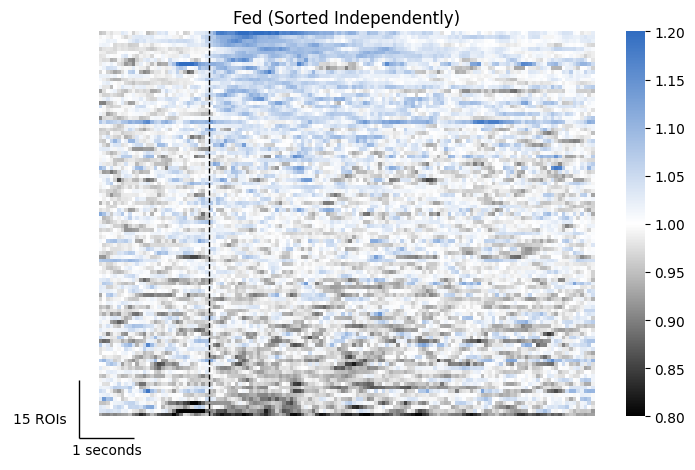

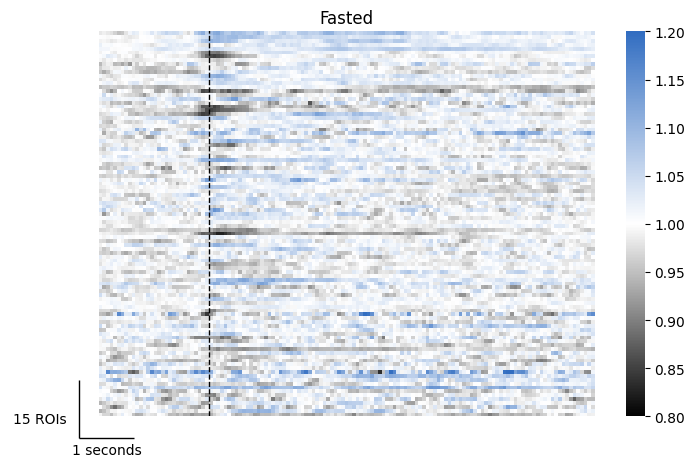

In [57]:

from matplotlib.colors import LinearSegmentedColormap

colors = ["#3a65c9", "#ffffff", "#383838"]
colors = ['#020202', '#ffffff', "#3670c2" ]
colors = ['#020202', '#ffffff', "#316dc1" ]
# colors = ['#020202', '#ffffff', "#3660c2" ]
# colors = ['#6588AD', '#ffffff', '#020202' ]
# colors = ['#020202', '#ffffff', "#455cc1" ]
# colors = ['#020202', '#ffffff', "#423cbe" ]
# colors = ['#020202', '#ffffff', '#6ea2d8' ]



custom_cmap = LinearSegmentedColormap.from_list("custom_bwblue", colors, N=256)



fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(all_avg_fed[:, 75:105], axis=1))[::-1]
sorted_avg_mean = all_avg_fed[ascending_order, :]
for cell in range(sorted_avg_mean.shape[0]):
    sorted_avg_mean[cell, :] = p2p.moving_average(sorted_avg_mean[cell, :], 3)
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap=custom_cmap)
ax.vlines(x = 75, ymin = -1, ymax = all_avg_fed.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlim(left = 45, right = 180)
ax.set_xlabel("Time from First Lick")
ax.set_title("Fed (Sorted Independently)")
sb = add_scalebar(ax, matchx=False, sizex=1*15, labelx='1 seconds', matchy=False, sep=4, sizey=-15, labely='15 ROIs',loc='lower left', bbox_to_anchor=(10, 10, 0.1, 0.4))
# plt.savefig('tracked_fed_heatmap_sortedbyfasted.pdf', bbox_inches='tight')


fig, ax = plt.subplots(1, figsize=(8, 5))
# ascending_order = np.argsort(np.nanmean(all_avg_f[:, 75:105], axis=1))[::-1]
sorted_avg_mean = all_avg_f[ascending_order, :]
for cell in range(sorted_avg_mean.shape[0]):
    sorted_avg_mean[cell, :] = p2p.moving_average(sorted_avg_mean[cell, :], 3)
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap=custom_cmap)
ax.vlines(x = 75, ymin = -1, ymax = all_avg_f.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_xlim(left = 45, right = 180)
sb = add_scalebar(ax, matchx=False, sizex=1*15, labelx='1 seconds', matchy=False, sep=4, sizey=-15, labely='15 ROIs',loc='lower left', bbox_to_anchor=(10, 10, 0.1, 0.4))
ax.set_title("Fasted")
# plt.savefig('tracked_fasted_heatmap_sortedbyfasted.pdf', bbox_inches='tight')


In [ ]:
# ascending_order = np.argsort(np.nanmean(all_avg_f[:, 75:105], axis=1))
# all_avg_f_sorted = all_avg_f[ascending_order, :]
# all_avg_fed_sorted = all_avg_fed[ascending_order, :]
Responsive: 29
Unresponsive: 71
Total: 100
Inhibited: 8
Activated: 21

Responsive: 28
Unresponsive: 72
Total: 100
Inhibited: 6
Activated: 22

In [243]:
fasted_activated_pvals, fasted_inhibited_pvals, pvals, null, Wobs = c2p.circ_shift(all_successful_f, all_aligned_f, alpha=0.05, base_pre = slice(75, 105), base_post = slice(150, 180),
              stim_pre = slice(75, 105), stim_post = slice(75, 105))
fed_activated_pvals, fed_inhibited_pvals, pvals, null, Wobs = c2p.circ_shift(all_successful_fed, all_aligned_fed, alpha=0.05, base_pre = slice(75, 105), base_post = slice(150, 180),
              stim_pre = slice(75, 105), stim_post = slice(75, 105))


Responsive: 32
Unresponsive: 68
Total: 100
Inhibited: 11
Activated: 21
Responsive: 29
Unresponsive: 71
Total: 100
Inhibited: 11
Activated: 18


In [245]:
fasted_activated_data = all_avg_f[fasted_activated_pvals < 0.05, :]
fasted_inhibited_data = all_avg_f[fasted_inhibited_pvals < 0.05, :]
fed_activated_data = all_avg_fed[fed_activated_pvals < 0.05, :]
fed_inhibited_data = all_avg_fed[fed_inhibited_pvals < 0.05, :]

fed_cells_activatedinfasting = all_avg_fed[fasted_activated_pvals < 0.05, :]
fasted_cells_activatedinfed = all_avg_f[fed_activated_pvals < 0.05, :]
fed_cells_inhibitedinfasting = all_avg_fed[fasted_inhibited_pvals < 0.05, :]
fasted_cells_inhibitedinfed = all_avg_f[fed_inhibited_pvals < 0.05, :]

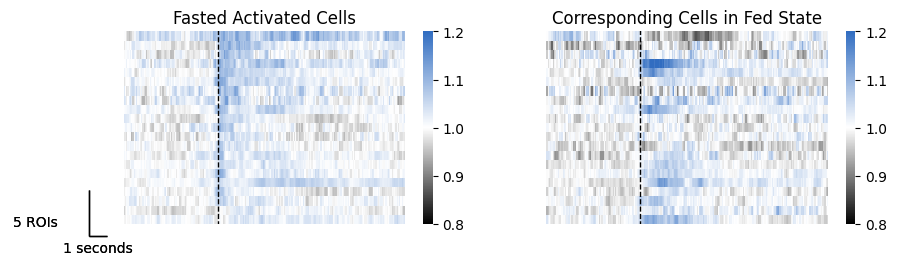

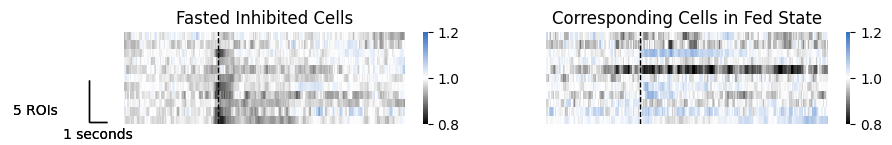

In [246]:
fig, axes = plt.subplots(1, 2, figsize=(10, 2.5))
ascending_order = np.argsort(np.nanmean(fasted_activated_data[:, 75:105], axis=1))[::-1]
sns.heatmap(p2p.moving_average(fasted_activated_data[ascending_order, :], 3), ax=axes[0], vmin=0.8, vmax=1.2, cmap=custom_cmap)
axes[0].set_title("Fasted Activated Cells")
sns.heatmap(p2p.moving_average(fed_cells_activatedinfasting[ascending_order, :], 3), ax=axes[1], vmin=0.8, vmax=1.2, cmap=custom_cmap)
axes[1].set_title("Corresponding Cells in Fed State")
sb = add_scalebar(axes[0], matchx=False, sizex=1*15, labelx='1 seconds', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
sb = add_scalebar(axes[1], matchx=False, sizex=1*15, labelx='1 seconds', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
axes[0].vlines(x = 75, ymin = -1, ymax = fasted_activated_data.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
axes[1].vlines(x = 75, ymin = -1, ymax = fasted_activated_data.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
# plt.savefig('tracked_fasted_activated_cells.pdf', bbox_inches='tight')

fig, axes = plt.subplots(1, 2, figsize=(10, 1.2))
ascending_order = np.argsort(np.nanmean(fasted_inhibited_data[:, 75:105], axis=1))[::-1]
sns.heatmap(p2p.moving_average(fasted_inhibited_data[ascending_order, :], 3), ax=axes[0], vmin=0.8, vmax=1.2, cmap=custom_cmap)
axes[0].set_title("Fasted Inhibited Cells")
sns.heatmap(p2p.moving_average(fed_cells_inhibitedinfasting[ascending_order, :], 3), ax=axes[1], vmin=0.8, vmax=1.2, cmap=custom_cmap)
axes[1].set_title("Corresponding Cells in Fed State")
sb = add_scalebar(axes[0], matchx=False, sizex=1*15, labelx='1 seconds', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
sb = add_scalebar(axes[1], matchx=False, sizex=1*15, labelx='1 seconds', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
axes[0].vlines(x = 75, ymin = -1, ymax = fasted_activated_data.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
axes[1].vlines(x = 75, ymin = -1, ymax = fasted_activated_data.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
# plt.savefig('tracked_fasted_inhibited_cells.pdf', bbox_inches='tight')

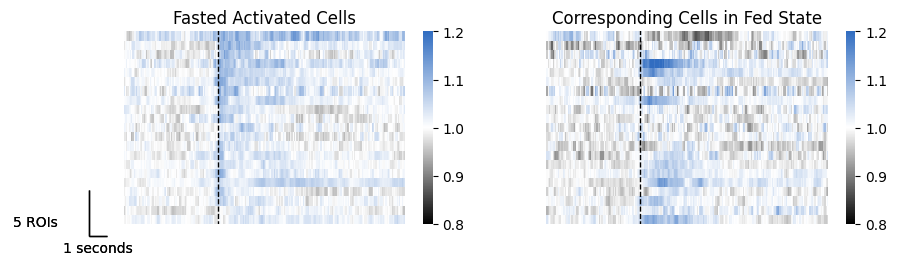

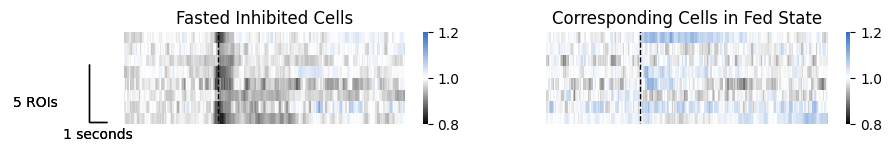

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 2.5))
ascending_order = np.argsort(np.nanmean(fasted_activated_data[:, 75:105], axis=1))[::-1]
sns.heatmap(p2p.moving_average(fasted_activated_data[ascending_order, :], 3), ax=axes[0], vmin=0.8, vmax=1.2, cmap=custom_cmap)
axes[0].set_title("Fasted Activated Cells")
sns.heatmap(p2p.moving_average(fed_cells_activatedinfasting[ascending_order, :], 3), ax=axes[1], vmin=0.8, vmax=1.2, cmap=custom_cmap)
axes[1].set_title("Corresponding Cells in Fed State")
sb = add_scalebar(axes[0], matchx=False, sizex=1*15, labelx='1 seconds', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
sb = add_scalebar(axes[1], matchx=False, sizex=1*15, labelx='1 seconds', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
axes[0].vlines(x = 75, ymin = -1, ymax = fasted_activated_data.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
axes[1].vlines(x = 75, ymin = -1, ymax = fasted_activated_data.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
# plt.savefig('tracked_fasted_activated_cells.pdf', bbox_inches='tight')

fig, axes = plt.subplots(1, 2, figsize=(10, 1.2))
ascending_order = np.argsort(np.nanmean(fasted_inhibited_data[:, 75:105], axis=1))[::-1]
sns.heatmap(p2p.moving_average(fasted_inhibited_data[ascending_order, :], 3), ax=axes[0], vmin=0.8, vmax=1.2, cmap=custom_cmap)
axes[0].set_title("Fasted Inhibited Cells")
sns.heatmap(p2p.moving_average(fed_cells_inhibitedinfasting[ascending_order, :], 3), ax=axes[1], vmin=0.8, vmax=1.2, cmap=custom_cmap)
axes[1].set_title("Corresponding Cells in Fed State")
sb = add_scalebar(axes[0], matchx=False, sizex=1*15, labelx='1 seconds', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
sb = add_scalebar(axes[1], matchx=False, sizex=1*15, labelx='1 seconds', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
axes[0].vlines(x = 75, ymin = -1, ymax = fasted_activated_data.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
axes[1].vlines(x = 75, ymin = -1, ymax = fasted_activated_data.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
# plt.savefig('tracked_fasted_inhibited_cells.pdf', bbox_inches='tight')

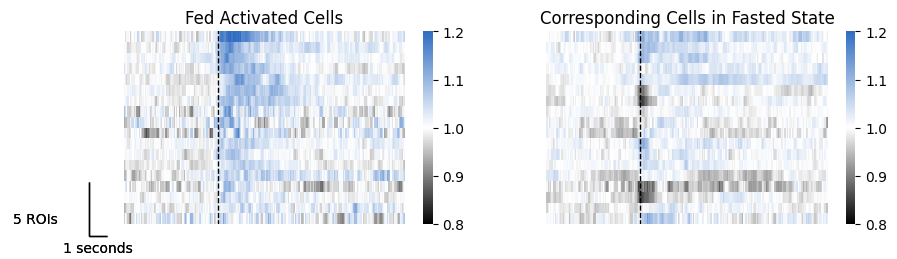

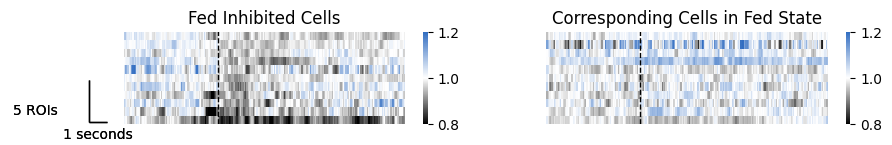

In [247]:
fig, axes = plt.subplots(1, 2, figsize=(10, 2.5))
ascending_order = np.argsort(np.nanmean(fed_activated_data[:, 75:105], axis=1))[::-1]
sns.heatmap(p2p.moving_average(fed_activated_data[ascending_order, :], 3), ax=axes[0], vmin=0.8, vmax=1.2, cmap=custom_cmap)
axes[0].set_title("Fed Activated Cells")
sns.heatmap(p2p.moving_average(fasted_cells_activatedinfed[ascending_order, :], 3), ax=axes[1], vmin=0.8, vmax=1.2, cmap=custom_cmap)
axes[1].set_title("Corresponding Cells in Fasted State")
sb = add_scalebar(axes[0], matchx=False, sizex=1*15, labelx='1 seconds', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
sb = add_scalebar(axes[1], matchx=False, sizex=1*15, labelx='1 seconds', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
axes[0].vlines(x = 75, ymin = -1, ymax = fasted_activated_data.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
axes[1].vlines(x = 75, ymin = -1, ymax = fasted_activated_data.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
# plt.savefig('tracked_fed_activated_cells.pdf', bbox_inches='tight')

fig, axes = plt.subplots(1, 2, figsize=(10, 1.2))
ascending_order = np.argsort(np.nanmean(fed_inhibited_data[:, 75:105], axis=1))[::-1]
sns.heatmap(p2p.moving_average(fed_inhibited_data[ascending_order, :], 3), ax=axes[0], vmin=0.8, vmax=1.2, cmap=custom_cmap)
axes[0].set_title("Fed Inhibited Cells")
sns.heatmap(p2p.moving_average(fasted_cells_inhibitedinfed[ascending_order, :], 3), ax=axes[1], vmin=0.8, vmax=1.2, cmap=custom_cmap)
axes[1].set_title("Corresponding Cells in Fed State")
sb = add_scalebar(axes[0], matchx=False, sizex=1*15, labelx='1 seconds', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
sb = add_scalebar(axes[1], matchx=False, sizex=1*15, labelx='1 seconds', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
axes[0].vlines(x = 75, ymin = -1, ymax = fasted_activated_data.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
axes[1].vlines(x = 75, ymin = -1, ymax = fasted_activated_data.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
# plt.savefig('tracked_fed_inhibited_cells.pdf', bbox_inches='tight')


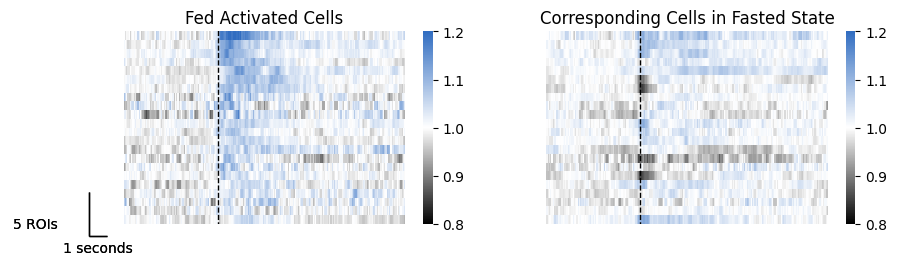

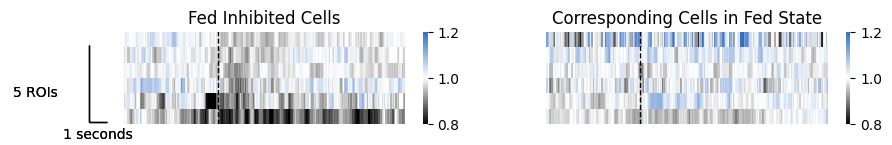

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(10, 2.5))
ascending_order = np.argsort(np.nanmean(fed_activated_data[:, 75:105], axis=1))[::-1]
sns.heatmap(p2p.moving_average(fed_activated_data[ascending_order, :], 3), ax=axes[0], vmin=0.8, vmax=1.2, cmap=custom_cmap)
axes[0].set_title("Fed Activated Cells")
sns.heatmap(p2p.moving_average(fasted_cells_activatedinfed[ascending_order, :], 3), ax=axes[1], vmin=0.8, vmax=1.2, cmap=custom_cmap)
axes[1].set_title("Corresponding Cells in Fasted State")
sb = add_scalebar(axes[0], matchx=False, sizex=1*15, labelx='1 seconds', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
sb = add_scalebar(axes[1], matchx=False, sizex=1*15, labelx='1 seconds', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
axes[0].vlines(x = 75, ymin = -1, ymax = fasted_activated_data.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
axes[1].vlines(x = 75, ymin = -1, ymax = fasted_activated_data.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
plt.savefig('tracked_fed_activated_cells.pdf', bbox_inches='tight')

fig, axes = plt.subplots(1, 2, figsize=(10, 1.2))
ascending_order = np.argsort(np.nanmean(fed_inhibited_data[:, 75:105], axis=1))[::-1]
sns.heatmap(p2p.moving_average(fed_inhibited_data[ascending_order, :], 3), ax=axes[0], vmin=0.8, vmax=1.2, cmap=custom_cmap)
axes[0].set_title("Fed Inhibited Cells")
sns.heatmap(p2p.moving_average(fasted_cells_inhibitedinfed[ascending_order, :], 3), ax=axes[1], vmin=0.8, vmax=1.2, cmap=custom_cmap)
axes[1].set_title("Corresponding Cells in Fed State")
sb = add_scalebar(axes[0], matchx=False, sizex=1*15, labelx='1 seconds', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
sb = add_scalebar(axes[1], matchx=False, sizex=1*15, labelx='1 seconds', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
axes[0].vlines(x = 75, ymin = -1, ymax = fasted_activated_data.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
axes[1].vlines(x = 75, ymin = -1, ymax = fasted_activated_data.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
plt.savefig('tracked_fed_inhibited_cells.pdf', bbox_inches='tight')


(21, 225)

In [ ]:
fasted_activated_auc = p2p.get_auc(fasted_activated_data, start_frame = 75, end_frame= 105, normalize = 2000)
fed_cells_fastedactivated_auc = p2p.get_auc(fed_cells_activatedinfasting, start_frame = 75, end_frame= 105, normalize = 2000)

fed_activated_auc = p2p.get_auc(fed_activated_data, start_frame = 75, end_frame= 105, normalize = 2000)
fasted_cells_fedactivated_auc = p2p.get_auc(fasted_cells_activatedinfed, start_frame = 75, end_frame= 105, normalize = 2000)

fasted_inhibited_auc = p2p.get_auc(fasted_inhibited_data, start_frame = 75, end_frame= 105, normalize = 2000)
fed_cells_fastedinhibited_auc = p2p.get_auc(fed_cells_inhibitedinfasting, start_frame = 75, end_frame= 105, normalize = 2000)

fed_inhibited_auc = p2p.get_auc(fed_inhibited_data, start_frame = 75, end_frame= 105, normalize = 2000)
fasted_cells_fedinhibited_auc = p2p.get_auc(fasted_cells_inhibitedinfed, start_frame = 75, end_frame= 105, normalize = 2000)

auc_df = pd.concat([
    pd.Series(fasted_activated_auc, name='fasted_activated_auc'),
    pd.Series(fed_cells_fastedactivated_auc, name='fed_cells_fastedactivated_auc'),
    pd.Series(fed_activated_auc, name='fed_activated_auc'),
    pd.Series(fasted_cells_fedactivated_auc, name='fasted_cells_fedactivated'),
    pd.Series(fasted_inhibited_auc, name='fasted_inhibited_auc'),
    pd.Series(fed_cells_fastedinhibited_auc, name='fed_cells_fastedinhibited_auc'),
    pd.Series(fed_inhibited_auc, name='fed_inhibited_auc'),
    pd.Series(fasted_cells_fedinhibited_auc, name='fasted_cells_fedinhibited_auc')
], axis=1)

# Save to CSV
auc_df.to_csv('results/trackedcells_auc_values.csv', index=False)

In [240]:
fasted_activated_max, fasted_activated_min = p2p.get_maxmin_f(fasted_activated_data, start_frame = 75, end_frame= 105)
fed_cells_fastedactivated_max, fed_cells_fastedactivated_min = p2p.get_maxmin_f(fed_cells_activatedinfasting, start_frame = 75, end_frame= 105)

fed_activated_max, fed_activated_min = p2p.get_maxmin_f(fed_activated_data, start_frame = 75, end_frame= 105)
fasted_cells_fedactivated_max, fasted_cells_fedactivated_min = p2p.get_maxmin_f(fasted_cells_activatedinfed, start_frame = 75, end_frame= 105)

fasted_inhibited_max, fasted_inhibited_min = p2p.get_maxmin_f(fasted_inhibited_data, start_frame = 75, end_frame= 105)
fed_cells_fastedinhibited_max, fed_cells_fastedinhibited_min = p2p.get_maxmin_f(fed_cells_inhibitedinfasting, start_frame = 75, end_frame= 105)

fed_inhibited_max, fed_inhibited_min = p2p.get_maxmin_f(fed_inhibited_data, start_frame = 75, end_frame= 105)
fasted_cells_fedinhibited_max, fasted_cells_fedinhibited_min = p2p.get_maxmin_f(fasted_cells_inhibitedinfed, start_frame = 75, end_frame= 105)

maxmin_df = pd.concat([
    pd.Series(fasted_activated_max, name='fasted_activated_max'),
    pd.Series(fasted_activated_min, name='fasted_activated_min'),
    pd.Series(fed_cells_fastedactivated_max, name='fed_cells_fastedactivated_max'),
    pd.Series(fed_cells_fastedactivated_min, name='fed_cells_fastedactivated_min'),
    pd.Series(fed_activated_max, name='fed_activated_max'),
    pd.Series(fed_activated_min, name='fed_activated_min'),
    pd.Series(fasted_cells_fedactivated_max, name='fasted_cells_fedactivated_max'),
    pd.Series(fasted_cells_fedactivated_min, name='fasted_cells_fedactivated_min'),
    pd.Series(fasted_inhibited_max, name='fasted_inhibited_max'),
    pd.Series(fasted_inhibited_min, name='fasted_inhibited_min'),
    pd.Series(fed_cells_fastedinhibited_max, name='fed_cells_fastedinhibited_max'),
    pd.Series(fed_cells_fastedinhibited_min, name='fed_cells_fastedinhibited_min'),
    pd.Series(fed_inhibited_max, name='fed_inhibited_max'),
    pd.Series(fed_inhibited_min, name='fed_inhibited_min'),
    pd.Series(fasted_cells_fedinhibited_max, name='fasted_cells_fedinhibited_max'),
    pd.Series(fasted_cells_fedinhibited_min, name='fasted_cells_fedinhibited_min'),
], axis=1)

# Save to CSV
maxmin_df.to_csv('results/trackedcells_max_values.csv', index=False)



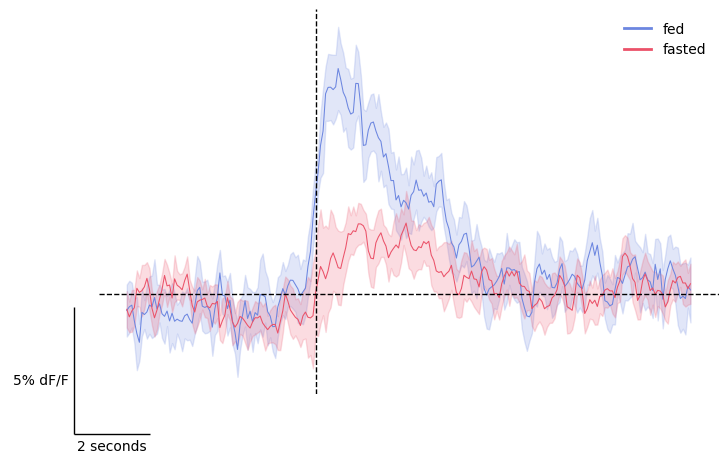

In [248]:
fig, ax = plt.subplots(1, figsize=(8, 5))
avg_suc_activated2 = np.nanmean(fed_activated_data, axis=0)
avg_suc_inhibited2 = np.nanmean(fasted_cells_activatedinfed, axis=0)
avg_suc_activated2 = p2p.moving_average(avg_suc_activated2, window_size = 3)
avg_suc_inhibited2 = p2p.moving_average(avg_suc_inhibited2, window_size = 3)
ax.plot(np.arange(0, 225), avg_suc_activated2, color = '#6c86e0', label = 'Activated', lw = 0.75)
ax.plot(np.arange(0, 225), avg_suc_inhibited2, color = '#eb5269', label = 'Inhibited', lw =0.75)
ax.fill_between(np.arange(0, 225), avg_suc_activated2 - stats.sem(fed_activated_data, axis=0), avg_suc_activated2 + stats.sem(fed_activated_data, axis=0), color = '#6c86e0', alpha = 0.2)
ax.fill_between(np.arange(0, 225), avg_suc_inhibited2 - stats.sem(fasted_cells_activatedinfed, axis=0), avg_suc_inhibited2 + stats.sem(fasted_cells_activatedinfed, axis=0), color = '#eb5269', alpha = 0.2)
ax.axvline(x = 75, color = 'black', linestyle = '--', lw = 1)
ax.axhline(y= 1, color = 'black', linestyle = '--', lw = 1)
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
sb = add_scalebar(ax, matchx=False, sizex=2*15, labelx='2 seconds', matchy=False, sep=4, sizey=0.05, labely='5% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))

custom_handles = [
    Line2D([0], [0], color='#6c86e0', lw=2),
    Line2D([0], [0], color='#eb5269', lw=2)
]


custom_labels = ['fed', 'fasted']

plt.legend(custom_handles, custom_labels, loc='best', frameon = False)

# plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/tracked_fedactivatedcells.pdf')

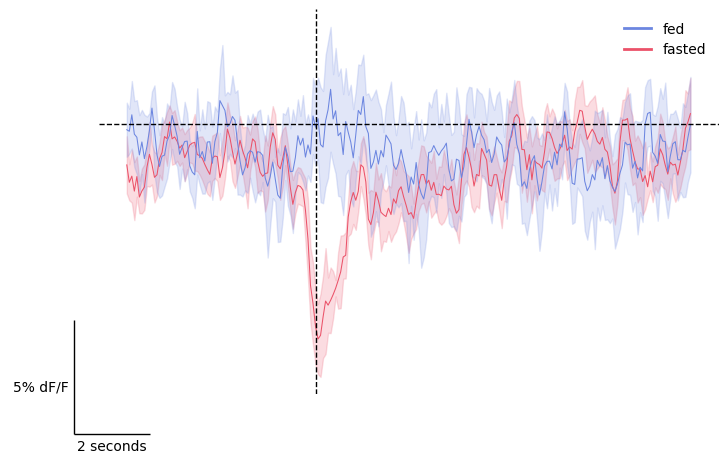

In [249]:
fig, ax = plt.subplots(1, figsize=(8, 5))
avg_suc_activated2 = np.nanmean(fasted_inhibited_data, axis=0)
avg_suc_inhibited2 = np.nanmean(fed_cells_inhibitedinfasting, axis=0)
avg_suc_activated2 = p2p.moving_average(avg_suc_activated2, window_size = 3)
avg_suc_inhibited2 = p2p.moving_average(avg_suc_inhibited2, window_size = 3)
ax.plot(np.arange(0, 225), avg_suc_activated2, color = '#eb5269', label = 'Activated', lw = 0.75)
ax.plot(np.arange(0, 225), avg_suc_inhibited2, color = '#6c86e0', label = 'Inhibited', lw =0.75)
ax.fill_between(np.arange(0, 225), avg_suc_activated2 - stats.sem(fasted_inhibited_data, axis=0), avg_suc_activated2 + stats.sem(fasted_inhibited_data, axis=0), color = '#eb5269', alpha = 0.2)
ax.fill_between(np.arange(0, 225), avg_suc_inhibited2 - stats.sem(fed_cells_inhibitedinfasting, axis=0), avg_suc_inhibited2 + stats.sem(fed_cells_inhibitedinfasting, axis=0), color = '#6c86e0', alpha = 0.2)
ax.axvline(x = 75, color = 'black', linestyle = '--', lw = 1)
ax.axhline(y= 1, color = 'black', linestyle = '--', lw = 1)
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
sb = add_scalebar(ax, matchx=False, sizex=2*15, labelx='2 seconds', matchy=False, sep=4, sizey=0.05, labely='5% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))

custom_handles = [
    Line2D([0], [0], color='#6c86e0', lw=2),
    Line2D([0], [0], color='#eb5269', lw=2)
]
custom_labels = ['fed', 'fasted']

plt.legend(custom_handles, custom_labels, loc='best', frameon = False)

# plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/tracked_fastedinhibited_cells.pdf')

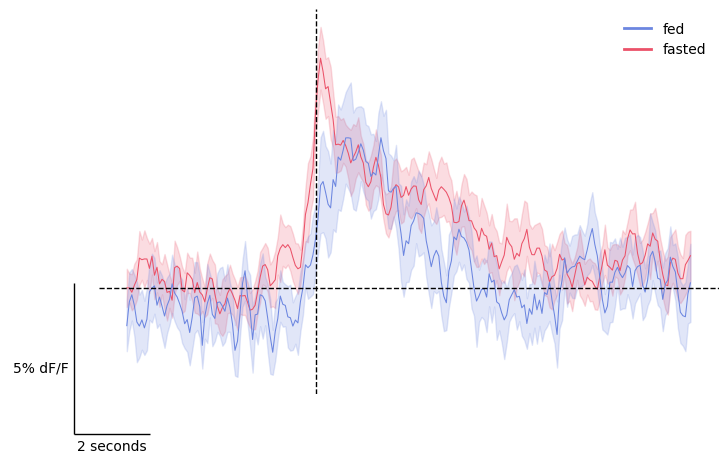

In [250]:
fig, ax = plt.subplots(1, figsize=(8, 5))
avg_suc_activated2 = np.nanmean(fasted_activated_data, axis=0)
avg_suc_inhibited2 = np.nanmean(fed_cells_activatedinfasting, axis=0)
avg_suc_activated2 = p2p.moving_average(avg_suc_activated2, window_size = 3)
avg_suc_inhibited2 = p2p.moving_average(avg_suc_inhibited2, window_size = 3)
ax.plot(np.arange(0, 225), avg_suc_activated2, color = '#eb5269', label = 'Activated', lw = 0.75)
ax.plot(np.arange(0, 225), avg_suc_inhibited2, color = '#6c86e0', label = 'Inhibited', lw =0.75)
ax.fill_between(np.arange(0, 225), avg_suc_activated2 - stats.sem(fasted_activated_data, axis=0), avg_suc_activated2 + stats.sem(fasted_activated_data, axis=0), color = '#eb5269', alpha = 0.2)
ax.fill_between(np.arange(0, 225), avg_suc_inhibited2 - stats.sem(fed_cells_activatedinfasting, axis=0), avg_suc_inhibited2 + stats.sem(fed_cells_activatedinfasting, axis=0), color = '#6c86e0', alpha = 0.2)
ax.axvline(x = 75, color = 'black', linestyle = '--', lw = 1)
ax.axhline(y= 1, color = 'black', linestyle = '--', lw = 1)
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
sb = add_scalebar(ax, matchx=False, sizex=2*15, labelx='2 seconds', matchy=False, sep=4, sizey=0.05, labely='5% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))

custom_handles = [
    Line2D([0], [0], color='#6c86e0', lw=2),
    Line2D([0], [0], color='#eb5269', lw=2)
]

custom_labels = ['fed', 'fasted']

plt.legend(custom_handles, custom_labels, loc='best', frameon = False)

# plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/tracked_fastedactivatedcells.pdf')

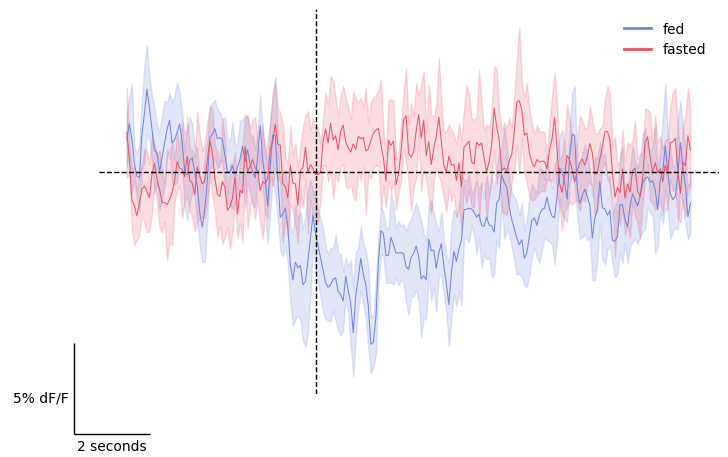

In [251]:
fig, ax = plt.subplots(1, figsize=(8, 5))
avg_suc_activated2 = np.nanmean(fed_inhibited_data, axis=0)
avg_suc_inhibited2 = np.nanmean(fasted_cells_inhibitedinfed, axis=0)
avg_suc_activated2 = p2p.moving_average(avg_suc_activated2, window_size = 3)
avg_suc_inhibited2 = p2p.moving_average(avg_suc_inhibited2, window_size = 3)
ax.plot(np.arange(0, 225), avg_suc_activated2, color = '#6c86e0', label = 'Activated', lw = 0.75)
ax.plot(np.arange(0, 225), avg_suc_inhibited2, color = '#eb5269', label = 'Inhibited', lw =0.75)
ax.fill_between(np.arange(0, 225), avg_suc_activated2 - stats.sem(fed_inhibited_data, axis=0), avg_suc_activated2 + stats.sem(fed_inhibited_data, axis=0), color = '#6c86e0', alpha = 0.2)
ax.fill_between(np.arange(0, 225), avg_suc_inhibited2 - stats.sem(fasted_cells_inhibitedinfed, axis=0), avg_suc_inhibited2 + stats.sem(fasted_cells_inhibitedinfed, axis=0), color = '#eb5269', alpha = 0.2)
ax.axvline(x = 75, color = 'black', linestyle = '--', lw = 1)
ax.axhline(y= 1, color = 'black', linestyle = '--', lw = 1)
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
sb = add_scalebar(ax, matchx=False, sizex=2*15, labelx='2 seconds', matchy=False, sep=4, sizey=0.05, labely='5% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))

custom_handles = [
    Line2D([0], [0], color='#6c86e0', lw=2),
    Line2D([0], [0], color='#eb5269', lw=2)
]

custom_labels = ['fed', 'fasted']

plt.legend(custom_handles, custom_labels, loc='best', frameon = False)

# plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/tracked_fedinhibitedcells.pdf')

In [203]:
glp17 = ['/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp17_fasted_d1', 
'/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp17_fasted_d2', 
# '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp17_fasted_d3',
'/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp17_fed_d3',  
'/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp17_fasted_d4'] 
glp17_rois = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/roi files/glp17_fastedseq_rois.csv'


glp23 = ['/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp23_fasted_d1', 
'/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp23_fasted_d2',
'/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp23_fed_d3', 
'/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp23_fasted_d4'] 
# '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp23_fasted_d5']
glp23_rois = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/roi files/glp23_fastedseq_rois.csv'

In [199]:
all_avg_17 = []
all_baseline_data_17 = []
all_aligned_17 = []
all_successful_17 = []
for i in range(len(glp17)):
    k = i
    # if i == 0:
    #     k = 1
    if i == 1:
        k = 2
    avg_f, baseline_data, aligned_f, successful_f = t2p.process_2p_rec_tracked(glp17[i], glp17_rois, roi_name = 'd' + str(k+1))
    all_avg_17.append(avg_f)
    all_baseline_data_17.append(baseline_data)
    all_aligned_17.append(aligned_f)
    all_successful_17.append(successful_f)
all_avg_23 = []
all_baseline_data_23 = []
all_aligned_23 = []
all_successful_23 = []
for i in range(len(glp23)):
    avg_f, baseline_data, aligned_f, successful_f = t2p.process_2p_rec_tracked(glp23[i], glp23_rois, roi_name = 'd' + str(i+1))
    all_avg_23.append(avg_f)
    all_baseline_data_23.append(baseline_data)
    all_aligned_23.append(aligned_f)
    all_successful_23.append(successful_f)


Did not filter ROI df
/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp17_fasted_d1
[0, 28, 33, 3, 22, 8, 13, 16, 17, 19, 20, 2, 21, 23, 25, 27, 26, 29, 32, 31, 34, 35, 37, 41]
Did not filter ROI df
/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp17_fasted_d3
[3, 31, 1, 5, 4, 15, 20, 21, 22, 23, 25, 0, 9, 26, 28, 30, 29, 33, 34, 35, 37, 39, 41, 43]
Did not filter ROI df
/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp17_fed_d3
[3, 31, 1, 5, 4, 15, 20, 21, 22, 23, 25, 0, 9, 26, 28, 30, 29, 33, 34, 35, 37, 39, 41, 43]
Did not filter ROI df
/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp17_fasted_d4
[2, 4, 5, 7, 8, 15, 20, 21, 22, 24, 25, 26, 28, 29, 31, 32, 33, 36, 37, 38, 40, 45, 47, 50]
Did not filter ROI df
/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp23_fasted_d1
[8, 3, 5, 9, 0, 1, 2, 7, 36, 14, 15, 16, 18, 19, 22, 6, 23, 26, 27, 28,

In [200]:
all_avg = []
for i in range(len(all_avg_17)):
    all_avg.append(np.concatenate((all_avg_17[i], all_avg_23[i]), axis=0))


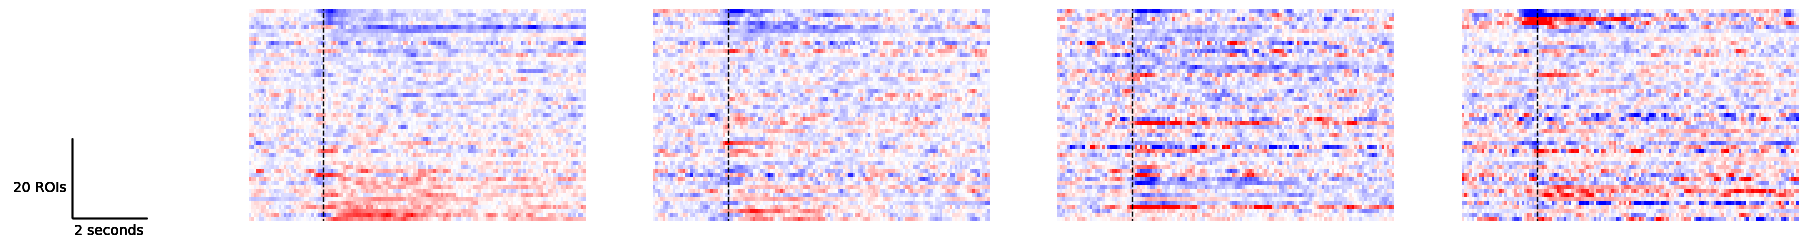

In [275]:

ascending_order = np.argsort(np.nanmean(all_avg[0][:, 75:100], axis=1))
fig, axes = plt.subplots(1, 4, figsize = (20, 2.75))
for i in range(len(all_avg)):
    sorted_avg_mean = all_avg[i][ascending_order, :] 
    for cell in range(sorted_avg_mean.shape[0]):
        sorted_avg_mean[cell, :] = p2p.moving_average(sorted_avg_mean[cell, :], 3)
    sns.heatmap(sorted_avg_mean, ax = axes[i], vmin=0.8, vmax=1.2, cmap='bwr', cbar=False)
    axes[i].vlines(x = 75, ymin = -1, ymax = all_avg[i].shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
    axes[i].set_xticks(np.arange(15, 255, 15)[::2])
    axes[i].set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
    axes[i].set_ylabel("ROI (Trial-Averaged)")
    axes[i].set_xlabel("Time from First Lick")
    axes[i].set_xlim(left = 45, right = 180) 
    sb = add_scalebar(axes[i], matchx=False, sizex=2*15, labelx='2 seconds', matchy=False, sep=4, sizey=-20, labely='20 ROIs',loc='lower left', bbox_to_anchor=(10, 10, 0.1, 0.4))

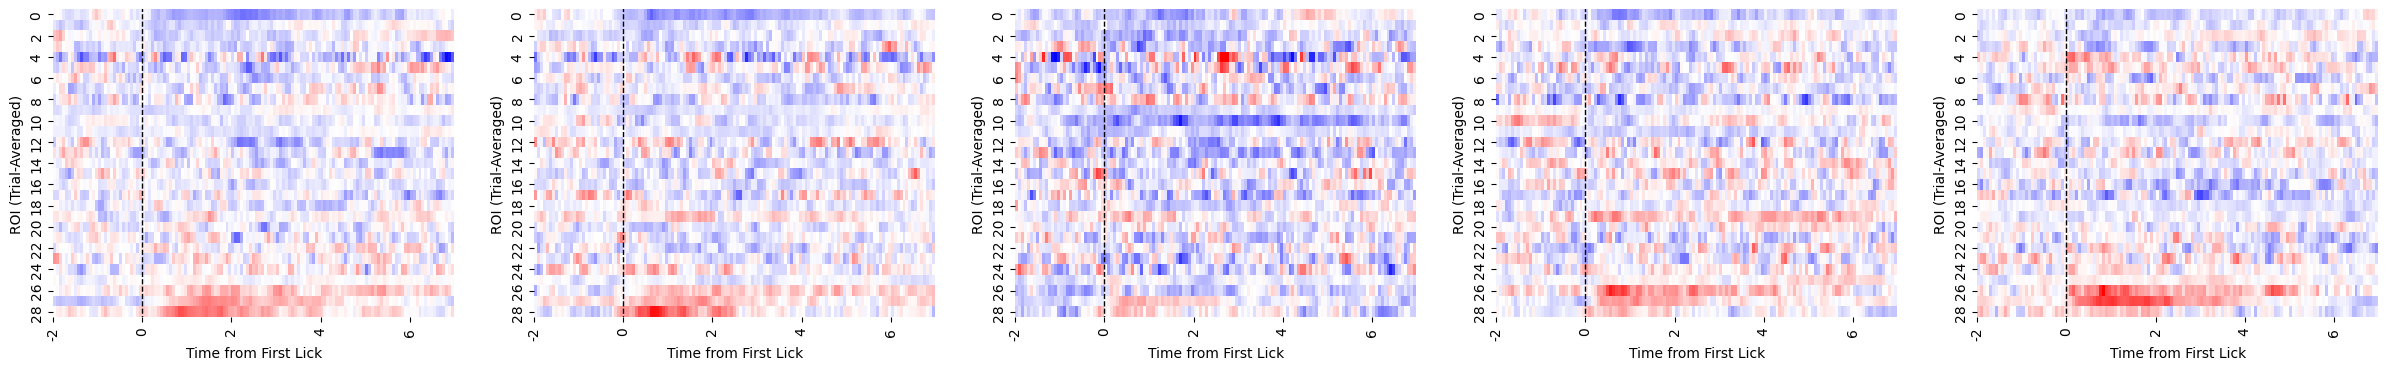

In [112]:
ascending_order = np.argsort(np.nanmean(all_avg[0][:, 75:105], axis=1))
fig, axes = plt.subplots(1, 5, figsize = (30, 4))
for i in range(len(all_avg)):
    sorted_avg_mean = all_avg[i][ascending_order, :] 
    for cell in range(sorted_avg_mean.shape[0]):
        sorted_avg_mean[cell, :] = p2p.moving_average(sorted_avg_mean[cell, :], 3)
    sns.heatmap(sorted_avg_mean, ax = axes[i], vmin=0.8, vmax=1.2, cmap='bwr', cbar=False)
    axes[i].vlines(x = 75, ymin = -1, ymax = all_avg[i].shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
    axes[i].set_xticks(np.arange(15, 255, 15)[::2])
    axes[i].set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
    axes[i].set_ylabel("ROI (Trial-Averaged)")
    axes[i].set_xlabel("Time from First Lick")
    axes[i].set_xlim(left = 45, right = 180)

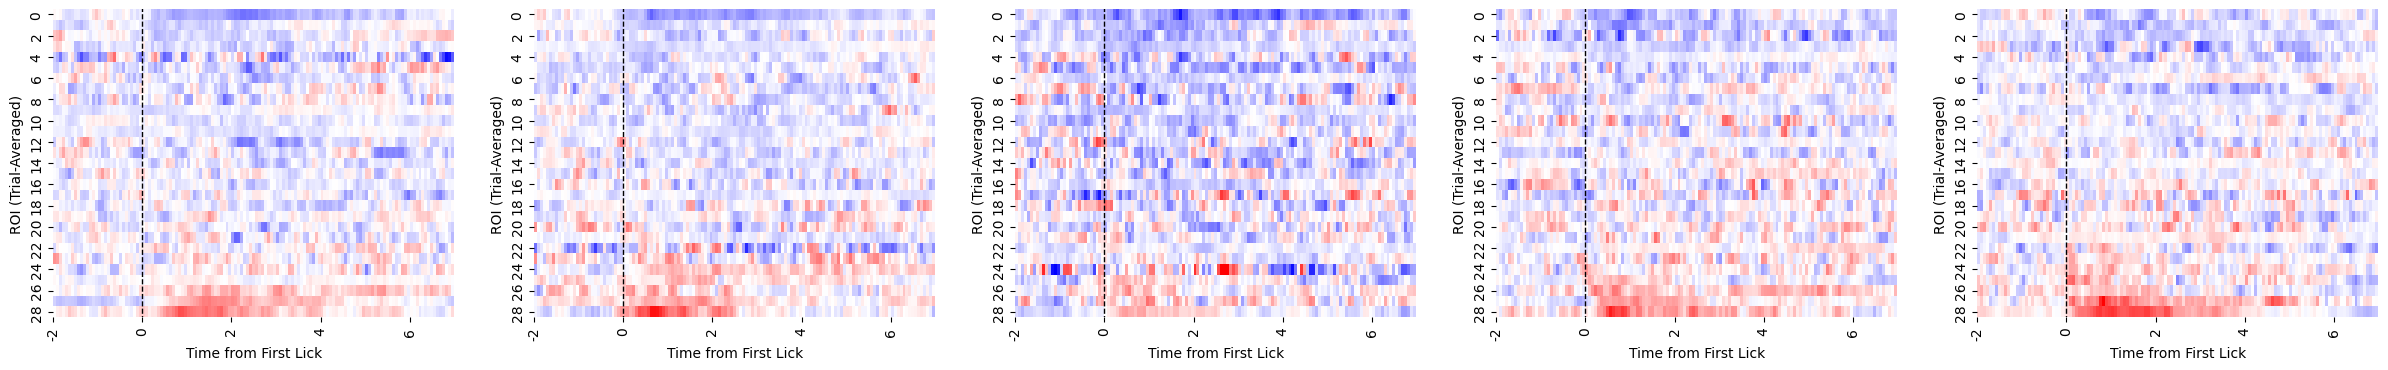

In [ ]:
ascending_order = np.argsort(np.nanmean(all_avg[0][:, 75:105], axis=1))
fig, axes = plt.subplots(1, 5, figsize = (30, 4))
for i in range(len(all_avg)):
    ascending_order = np.argsort(np.nanmean(all_avg[i][:, 75:105], axis=1))
    sorted_avg_mean = all_avg[i][ascending_order, :] 
    for cell in range(sorted_avg_mean.shape[0]):
        sorted_avg_mean[cell, :] = p2p.moving_average(sorted_avg_mean[cell, :], 3)
    sns.heatmap(sorted_avg_mean, ax = axes[i], vmin=0.8, vmax=1.2, cmap='bwr', cbar=False)
    axes[i].vlines(x = 75, ymin = -1, ymax = all_avg[i].shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
    axes[i].set_xticks(np.arange(15, 255, 15)[::2])
    axes[i].set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
    axes[i].set_ylabel("ROI (Trial-Averaged)")
    axes[i].set_xlabel("Time from First Lick")
    axes[i].set_xlim(left = 45, right = 180)